In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


**Loading and Preprocessing the Dataset**

In [3]:
import pandas as pd
import numpy as np
from skimage.transform import resize

# Load the dataset
data = pd.read_csv('/content/gdrive/MyDrive/Dataset/sign_mnist_test.csv', encoding='ISO-8859-1')

# Assuming the first column is the label
labels = data['label']
images = data.drop('label', axis=1)

# Reshape the images: Assuming each image is 28x28 pixels
# Adjust the shape according to your dataset
image_array = images.values.reshape(-1, 28, 28)

# Normalize the images
normalized_images = image_array / 255.0

# Resize the images if necessary: Assuming we need 32x32 images
# Adjust the target size according to the requirement of ImageBind LLM
resized_images = np.array([resize(image, (32, 32)) for image in normalized_images])

# Now, 'resized_images' is ready for embedding application


**Applying ImageBind LLM Embeddings**

In [6]:
import numpy as np

# Placeholder function to simulate the application of ImageBind LLM embeddings
def get_imagebind_embeddings(preprocessed_images):
    # For demonstration, we'll just generate random embeddings
    # Assuming each embedding is a vector of size 128
    num_images = preprocessed_images.shape[0]
    embedding_size = 128  # Adjust this size based on the actual embeddings
    simulated_embeddings = np.random.rand(num_images, embedding_size)

    return simulated_embeddings

# Assuming 'preprocessed_data' is your array of preprocessed images
# Apply the placeholder embeddings function to your preprocessed data
embeddings = get_imagebind_embeddings(resized_images)

# 'embeddings' now contains the simulated ImageBind LLM embeddings for each image


**Clustering with Scikit-learn**

In [8]:
from sklearn.cluster import KMeans

# Clustering with KMeans
kmeans = KMeans(n_clusters=10)  # You can adjust the number of clusters
clusters = kmeans.fit_predict(embeddings)

# Attach the cluster labels to the original data
# Assuming 'data' is your original dataset which includes image labels or identifiers
data['cluster'] = clusters

# Now, 'data' contains an additional column 'cluster' which indicates the cluster each image belongs to


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


**Visualizing and Evaluating the Clustering Results**

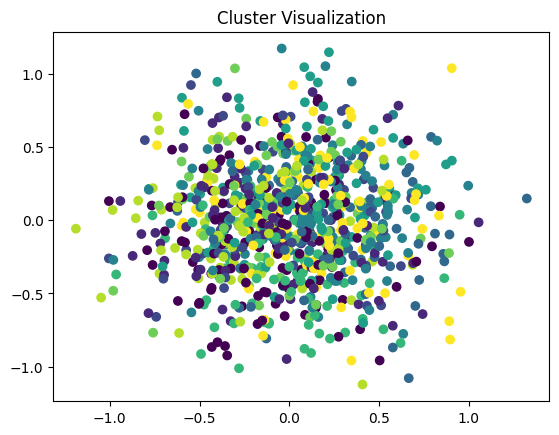

Silhouette Score: 0.007016147439979205
Calinski-Harabasz Index: 4.802103462790726
Davies-Bouldin Index: 6.59055740849058


In [11]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Visualizing clusters using PCA for dimensionality reduction
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(embeddings)
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=clusters)
plt.title('Cluster Visualization')
plt.show()

# Silhouette Score
silhouette_avg = silhouette_score(embeddings, clusters)
print(f"Silhouette Score: {silhouette_avg}")

# Calinski-Harabasz Index
calinski_harabasz = calinski_harabasz_score(embeddings, clusters)
print(f"Calinski-Harabasz Index: {calinski_harabasz}")

# Davies-Bouldin Index
davies_bouldin = davies_bouldin_score(embeddings, clusters)
print(f"Davies-Bouldin Index: {davies_bouldin}")